In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6228,Nissan,Juke,2016,premium unleaded (recommended),188.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback",Compact,4dr Hatchback,31,26,2009,22100
8043,Dodge,RAM 150,1991,regular unleaded,125.0,6.0,UNKNOWN,rear wheel drive,2.0,NaN,Large,Regular Cab Pickup,17,12,1851,2000
8071,Dodge,RAM 150,1993,regular unleaded,230.0,8.0,MANUAL,rear wheel drive,2.0,NaN,Large,Extended Cab Pickup,16,12,1851,2000
1842,Volkswagen,Beetle Convertible,2015,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,NaN,Compact,Convertible,32,24,873,27475
7949,Infiniti,QX80,2014,premium unleaded (recommended),400.0,8.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,4dr SUV,20,14,190,62700


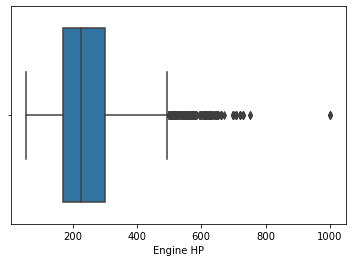

In [2]:
# With and without 
sns.boxplot(x=df['Engine HP'])

In [3]:
# Sacar cuartiles

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [4]:
# Límite superior antes de outlier
ls = (Q3 + 1.5 * IQR)
ls

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [5]:
# Límite inferior antes de outlier
li = (Q1 - (1.5 * IQR))
li

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

In [9]:
df.shape

(11914, 16)

In [30]:
df_hp_with_outiers = df[((df < li) |(df > ls)).any(axis=1)]
df_hp_with_outiers.shape

(2830, 16)

In [31]:
df_hp_with_outiers["Engine HP"]

17       172.0
18       172.0
19       172.0
20       172.0
21       172.0
         ...  
11794    145.0
11810    106.0
11903    394.0
11904    394.0
11905    394.0
Name: Engine HP, Length: 2830, dtype: float64

¿Por qué aparecen aparecen más valores aparte de los que son  en la columna "Engine HP"? Porque con la fórmula también se quitan los  de las demás columnas.

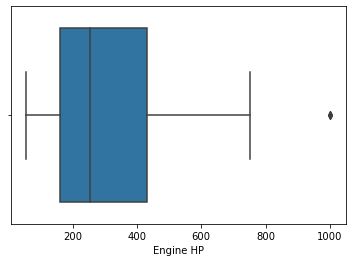

In [33]:
# Without 
sns.boxplot(x=df_hp_with_outiers['Engine HP'])

In [25]:
df_without_ = df[~((df < li) |(df > ls)).any(axis=1)]
df_without_.shape

(9084, 16)

In [26]:
df_without_["Engine HP"]

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: Engine HP, Length: 9084, dtype: float64

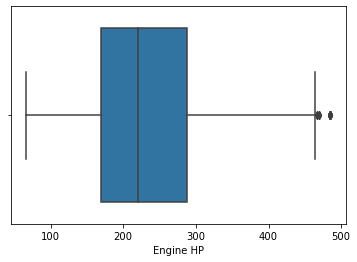

In [29]:
# Without 
sns.boxplot(x=df_without_['Engine HP'])

In [27]:
df_without_["Engine HP"].max()

485.0

In [28]:
df_without_outlers["Engine HP"].min()

66.0

La decisión de eliminar cada outlier depende de cada problema

In [ ]:
# Coger solo los  de Engine HP
# límite inferior

li_hp = li["Engine HP"]
